# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, make_scorer
from sklearn.preprocessing import LabelEncoder
from numpy import interp
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data_train_df= pd.read_csv("fashion-mnist_train.csv")
data_test_df= pd.read_csv("fashion-mnist_test.csv")

In [4]:
data_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
X_train = data_train_df.iloc[:, 1:]  
y_train = data_train_df['label']    

X_test = data_test_df.iloc[:, 1:]   
y_test = data_test_df['label']      

In [9]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [12]:
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [13]:
def get_data_info(df, name):
    print(f"{name} Data Summary:")
    print(f"Shape: {df.shape}")
    print(f"Missing Values: {df.isnull().sum()}")
    print("\n")

In [14]:
get_data_info(X_train, "X_train")
get_data_info(X_test, "X_test")
get_data_info(y_train, "y_train")
get_data_info(y_test, "y_test")

X_train Data Summary:
Shape: (60000, 784)
Missing Values: pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


X_test Data Summary:
Shape: (10000, 784)
Missing Values: pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


y_train Data Summary:
Shape: (60000,)
Missing Values: 0


y_test Data Summary:
Shape: (10000,)
Missing Values: 0


In [15]:
print(y_train.unique())
print(y_test.unique())

[2 9 6 0 3 4 5 8 7 1]
[0 1 2 3 8 6 5 4 7 9]


In [16]:
y_train.value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [17]:
y_test.value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

In [20]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (60000, 784)
X_test shape :  (10000, 784)
y_train shape :  (60000,)
y_test shape :  (10000,)


In [21]:
# X_train_df = pd.DataFrame(X_train)
# X_test_df = pd.DataFrame(X_test)
# 
# correlation_matrix_train = X_train_df.corr().abs()
# highly_correlated_train = np.triu(correlation_matrix_train, k=1) > 0.9
# correlated_features_train = np.where(highly_correlated_train)
# 
# features_to_drop_train = set()
# for feature1, feature2 in zip(*correlated_features_train):
#     features_to_drop_train.add(feature2)
# 
# X_train_filtered = X_train_df.drop(columns=X_train_df.columns[list(features_to_drop_train)])
# X_test_filtered = X_test_df.drop(columns=X_test_df.columns[list(features_to_drop_train)])
# 
# print("Remaining features after removing highly correlated ones in X_train:")
# print(X_train_filtered.columns)
# print("\nRemaining features after removing highly correlated ones in X_test:")
# print(X_test_filtered.columns)


In [22]:
# X_train = X_train_filtered
# X_test = X_test_filtered

In [23]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (60000, 784)
X_test shape :  (10000, 784)
y_train shape :  (60000,)
y_test shape :  (10000,)


# Model selection

* LogisticRegression
* SVM
* KNN
* Bagging
* AdaBoost
* XGBoost

## LogisticRegression 

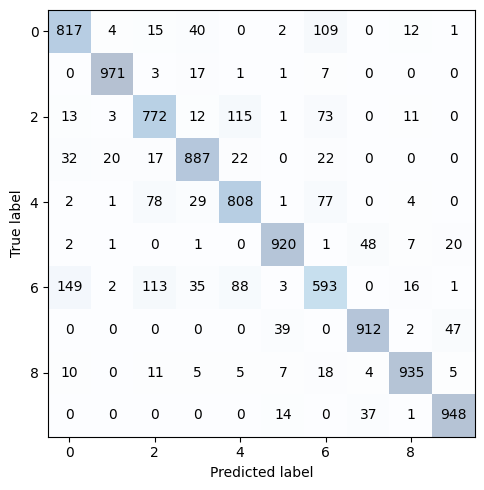

In [24]:
pipe_log_reg = make_pipeline(
    StandardScaler(),
    PCA(n_components=200),
    LogisticRegression(random_state=1)
)

pipe_log_reg.fit(X_train, y_train)
y_pred = pipe_log_reg.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [21]:
acc_val = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {acc_val:.3f}')

pre_val = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1: {f1_val:.3f}')

Accuracy: 0.847
Precision: 0.845
Recall: 0.847
F1: 0.846


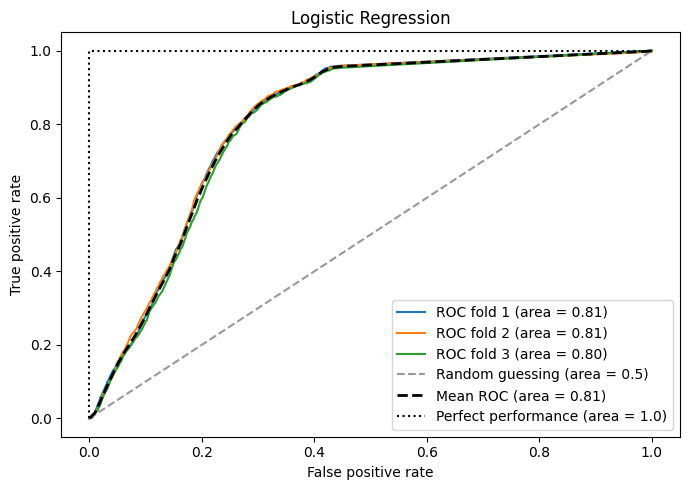

In [22]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           C=0.01))

X_train_vals = X_train.values
y_train_vals = y_train.values
X_train2 = X_train_vals[:, [4, 14]]
    
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_vals[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_vals[test],
                                     probas[:, 1],
                                     pos_label=1)
        
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title("Logistic Regression")

plt.tight_layout()
plt.show()

## SVM

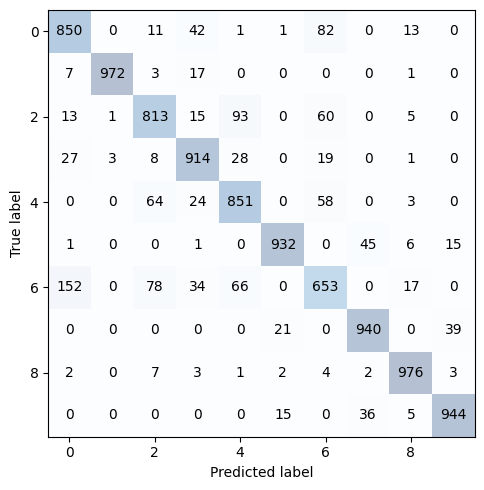

In [23]:
pipe_svc = make_pipeline(
    StandardScaler(),
    PCA(n_components=150),
    SVC(random_state=1)
)

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [24]:
acc_val = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {acc_val:.3f}')

pre_val = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1: {f1_val:.3f}')

Accuracy: 0.884
Precision: 0.884
Recall: 0.884
F1: 0.884


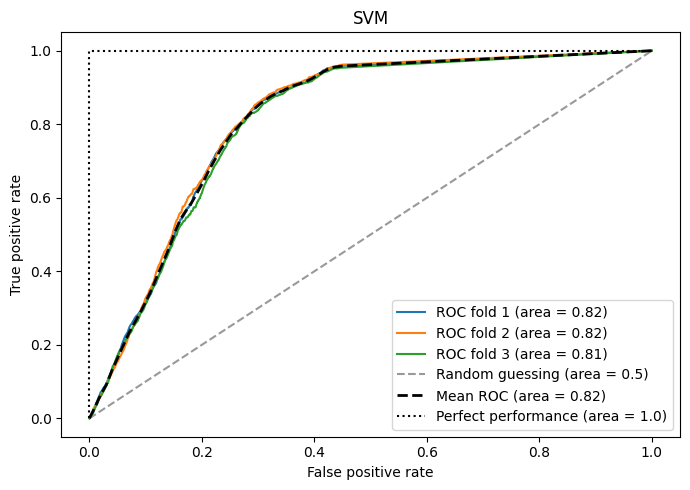

In [25]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        SVC(random_state=1,
                             C=0.01, probability=True))

X_train_vals = X_train.values
y_train_vals = y_train.values
X_train2 = X_train_vals[:, [4, 14]]
    
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_vals[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_vals[test],
                                     probas[:, 1],
                                     pos_label=1)
        
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title("SVM")

plt.tight_layout()
plt.show()

## KNN

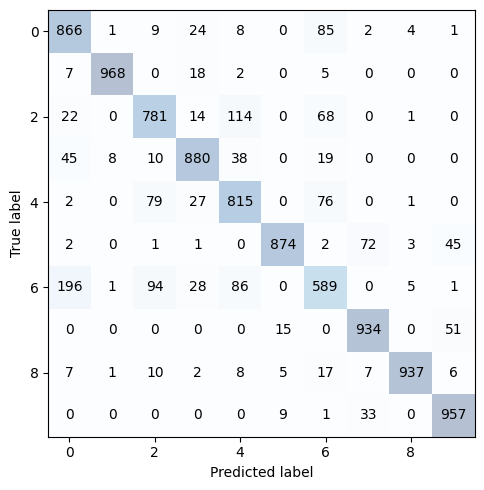

In [26]:
pipe_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=150),
    KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
)

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [27]:
acc_val = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {acc_val:.3f}')

pre_val = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1: {f1_val:.3f}')

Accuracy: 0.860
Precision: 0.861
Recall: 0.860
F1: 0.859


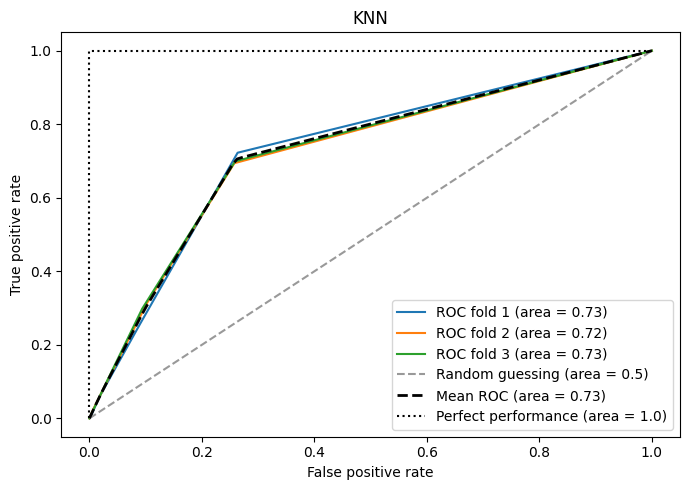

In [28]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        KNeighborsClassifier(n_neighbors=5, 
                                              p=2, 
                                              metric='minkowski'))

X_train_vals = X_train.values
y_train_vals = y_train.values
X_train2 = X_train_vals[:, [4, 14]]
    
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_vals[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_vals[test],
                                     probas[:, 1],
                                     pos_label=1)
        
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title("KNN")

plt.tight_layout()
plt.show()

## Bagging

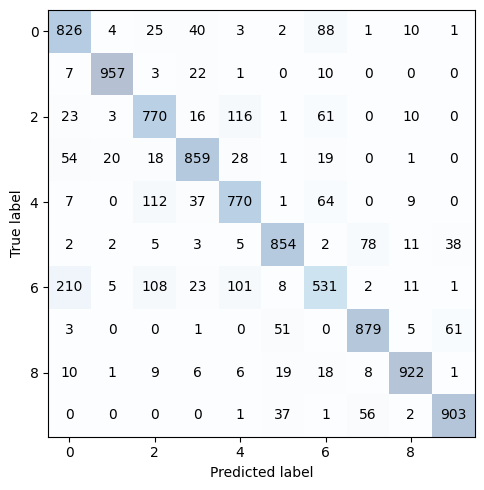

In [29]:
pipe_bagging = make_pipeline(
    StandardScaler(),
    PCA(n_components=170),
    BaggingClassifier(n_estimators=10, random_state=42)
)

pipe_bagging.fit(X_train, y_train)
y_pred = pipe_bagging.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [56]:
acc_val = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {acc_val:.3f}')

pre_val = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1: {f1_val:.3f}')

Accuracy: 0.827
Precision: 0.826
Recall: 0.827
F1: 0.826


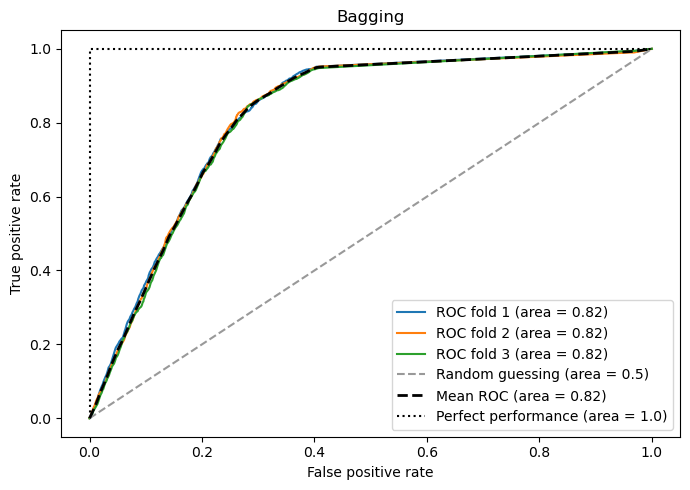

In [57]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        BaggingClassifier(n_estimators=10, random_state=42))

X_train_vals = X_train.values
y_train_vals = y_train.values
X_train2 = X_train_vals[:, [4, 14]]
    
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_vals[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_vals[test],
                                     probas[:, 1],
                                     pos_label=1)
        
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title("Bagging")

plt.tight_layout()
plt.show()

## AdaBoost

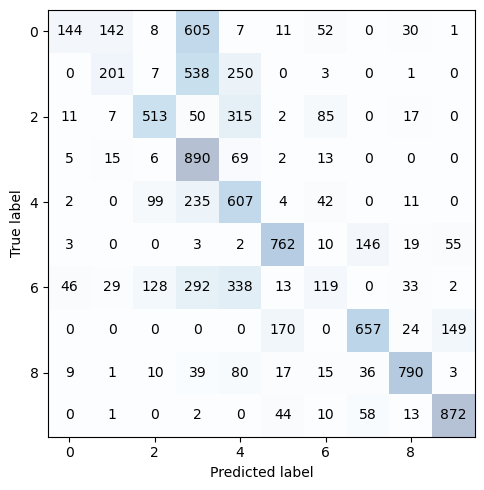

In [58]:
pipe_adaboost = make_pipeline(
    StandardScaler(),
    PCA(n_components=170),
    AdaBoostClassifier(random_state=5, learning_rate = 0.7)
)

pipe_adaboost.fit(X_train, y_train)
y_pred = pipe_adaboost.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [59]:
acc_val = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {acc_val:.3f}')

pre_val = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1: {f1_val:.3f}')

Accuracy: 0.555
Precision: 0.599
Recall: 0.555
F1: 0.532


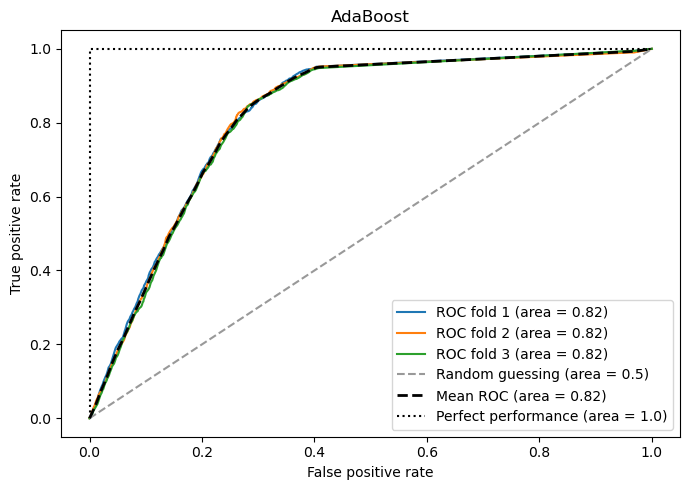

In [60]:
pipe_adaboost = make_pipeline(StandardScaler(),
                              PCA(n_components=2),
                              AdaBoostClassifier(random_state=5, learning_rate = 0.7))

X_train_vals = X_train.values
y_train_vals = y_train.values
X_train2 = X_train_vals[:, [4, 14]]
    
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_vals[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_vals[test],
                                     probas[:, 1],
                                     pos_label=1)
        
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title("AdaBoost")

plt.tight_layout()
plt.show()

## XGBoost

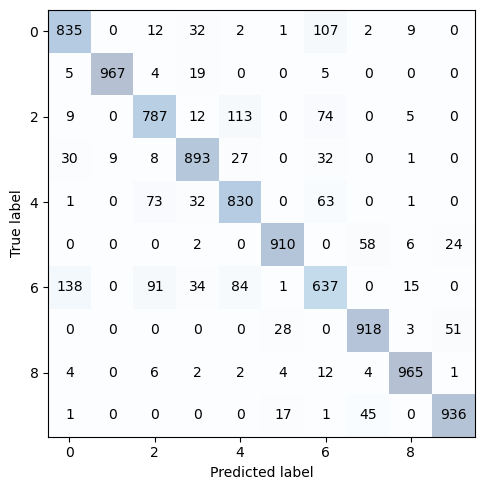

In [61]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe_xgb = make_pipeline(
    StandardScaler(),  
    PCA(n_components=50),  
    xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train))) 
)
pipe_xgb.fit(X_train, y_train)
y_pred = pipe_xgb.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [62]:
acc_val = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {acc_val:.3f}')

pre_val = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1: {f1_val:.3f}')

Accuracy: 0.868
Precision: 0.867
Recall: 0.868
F1: 0.867


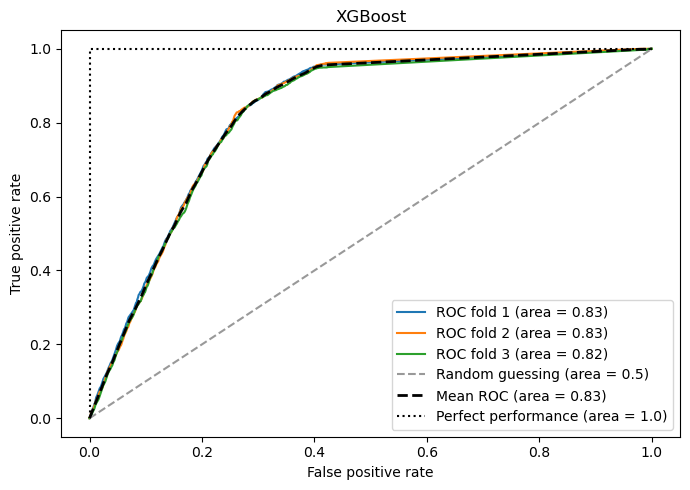

In [63]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train))))

X_train_vals = X_train.values
y_train_vals = y_train
X_train2 = X_train_vals[:, [4, 14]]
    
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_vals[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_vals[test],
                                     probas[:, 1],
                                     pos_label=1)
        
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title("XGBoost")

plt.tight_layout()
plt.show()

# Hyperparameter Tuning

## LogisticRegression

In [64]:
scorer = make_scorer(f1_score, average='weighted')  

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2', None]
c = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__solver': solver,
               'logisticregression__penalty' : penalty,
               'logisticregression__C' : c}]

gs = GridSearchCV(estimator=pipe_log_reg,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print("LogisticRegression f1 score: ", gs.best_score_)
print("LogisticRegression best params: ", gs.best_params_)

/Users/varditerkeropyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/varditerkeropyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogisticRegression f1 score:  0.8414541390207461
LogisticRegression best params:  {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}


## SVM

In [65]:
scorer = make_scorer(f1_score, average='weighted')

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': [0.01, 1.0, 10],
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print("svc f1 score: ", gs.best_score_)
print("svc best params: ", gs.best_params_)

KeyboardInterrupt: 

## KNN

In [ ]:
scorer = make_scorer(f1_score, average='weighted')

param_grid = [{'kneighborsclassifier__n_neighbors': [3, 5, 9],
               'kneighborsclassifier__leaf_size': [15, 25, 30, 45],
               'kneighborsclassifier__weights': ['uniform', 'distance']}]

gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print("knn f1 score: ", gs.best_score_)
print("knn best params: ", gs.best_params_)

## Bagging

In [ ]:
pipe_bagging_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=170),
    BaggingClassifier(estimator=KNeighborsClassifier())
)

param_grid = [{
    'baggingclassifier__base_estimator__n_neighbors': [3, 5, 9],
    'baggingclassifier__base_estimator__leaf_size': [15, 25, 45],
    'baggingclassifier__base_estimator__weights': ['uniform', 'distance'],
    'baggingclassifier__n_estimators': [10, 50],
    'baggingclassifier__bootstrap': [True, False]
}]

scorer = make_scorer(f1_score, average='weighted')

gs = GridSearchCV(estimator=pipe_bagging_knn,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=3,
                  n_jobs=-1)

gs.fit(X_train, y_train)

print("Best F1 score:", gs.best_score_)
print("Best parameters:", gs.best_params_)

## AdaBoost

In [ ]:
pipe_adaboost = make_pipeline(
    StandardScaler(),
    PCA(n_components=170),
    AdaBoostClassifier(random_state=5)
)

param_grid = [{
    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.1, 0.5, 0,7, 1.0],
    'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R']
}]

scorer = make_scorer(f1_score, average='weighted')

gs = GridSearchCV(estimator=pipe_adaboost,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=3,
                  n_jobs=-1)

gs.fit(X_train, y_train)

print("Best F1 score:", gs.best_score_)
print("Best parameters:", gs.best_params_)

## XGBoost

In [ ]:
pipe_xgb = make_pipeline(
    StandardScaler(),
    PCA(n_components=170),
    xgb.XGBClassifier(random_state=5)
)

param_grid = [{
    'xgbclassifier__n_estimators': [50, 100, 200],
    'xgbclassifier__learning_rate': [0.1, 0.5, 1.0],
    'xgbclassifier__max_depth': [3, 6, 9],
    'xgbclassifier__gamma': [0, 0.1, 0.2]
}]

scorer = make_scorer(f1_score, average='weighted')

gs = GridSearchCV(estimator=pipe_xgb,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=3,
                  n_jobs=-1)

gs.fit(X_train, y_train)

print("Best F1 score:", gs.best_score_)
print("Best parameters:", gs.best_params_)
